In [3]:
import pandas as pd
import numpy as np
data  = pd.read_csv("/content/Custom_CNN_Features.csv")
data.head()

,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016


Data Types:
 Filename        object
Class Label      int64
f0             float64
f1             float64
f2             float64
                ...   
f195           float64
f196           float64
f197           float64
f198           float64
f199           float64
Length: 202, dtype: object

Missing Values:
 Series([], dtype: int64)

Class Balance:
 Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64


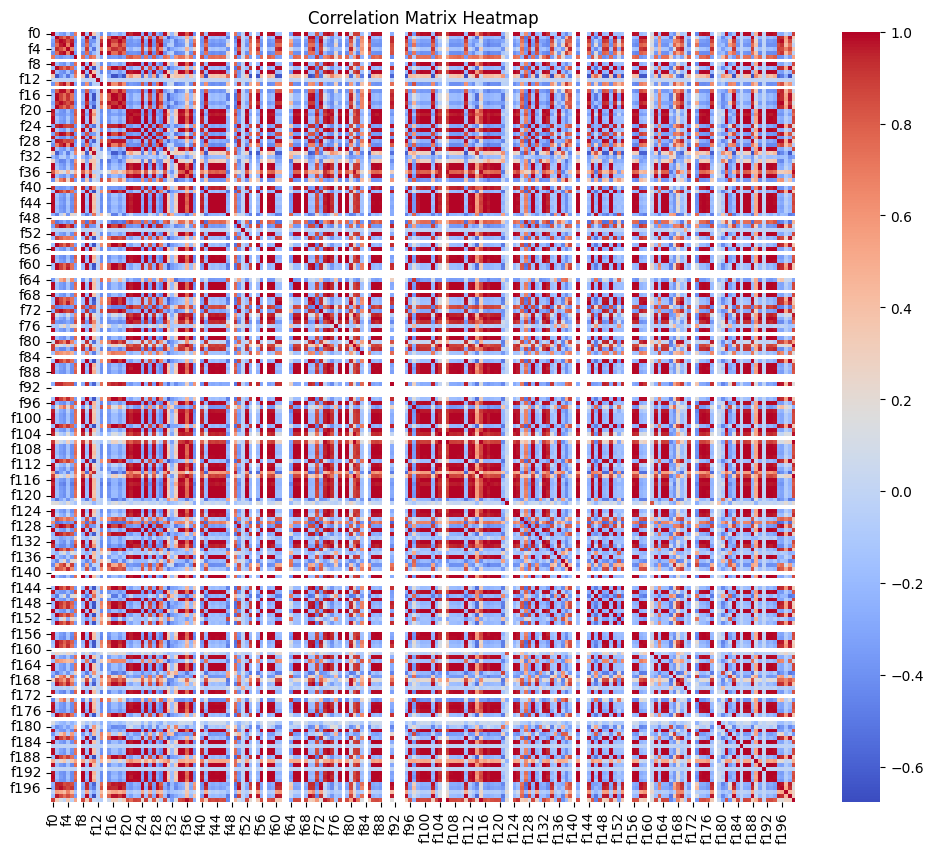


Matrix Rank: 174

Data Range:
                 f0           f1           f2           f3           f4  \
count  3253.000000  3253.000000  3253.000000  3253.000000  3253.000000   
mean     17.516938    57.919104   112.822180   170.829473    17.606476   
std      54.948034    93.672074    96.561850   124.512873    35.626627   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    46.988506    85.638191     0.000000   
50%       0.000000     0.000000    93.278381   160.636246     0.000000   
75%       0.000000   117.704697   159.855179   248.145508    12.160916   
max     781.789490   459.207794   536.879639   760.753845   202.598496   

                f5           f6      f7            f8           f9  ...  \
count  3253.000000  3253.000000  3253.0   3253.000000  3253.000000  ...   
mean    141.614480    11.035532     0.0    214.312125    32.698847  ...   
std      99.128478    20.554964     0.0    738.811309    52.730102  ...   
m

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# 1. Data Types of Attributes
print("Data Types:\n", data.dtypes)

# 2. Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# 3. Class Balance
# Analyze class balance (target column assumed as 'Class Label')
class_balance = data['Class Label'].value_counts()
print("\nClass Balance:\n", class_balance)

# 4. Attribute Correlation Study
# Generate a correlation matrix (numeric columns only, excluding non-numeric ones)
correlation_matrix = data.iloc[:, 2:].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# 5. Matrix Rank Study
# Calculate the rank of the matrix (numeric data only)
numeric_data = data.iloc[:, 2:]  # Exclude non-numeric columns
rank = np.linalg.matrix_rank(numeric_data.values)
print("\nMatrix Rank:", rank)

# 6. Data Range and Normalization
# Data range
data_range = numeric_data.describe()
print("\nData Range:\n", data_range)

# Normalization (Min-Max scaling example)
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_data.columns)
print("\nNormalized Data (first 5 rows):\n", normalized_data.head())


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import time
import pandas as pd

# Assume 'normalized_data' and 'data' are already loaded, and the target is 'Class Label'

# A2: Split dataset into train & test sets (75:25 split)
X = normalized_data  # Features (normalized numeric data)
y = data['Class Label']  # Target (Class Label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define classifiers
models = {
    "kNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Naïve Bayes": GaussianNB(),
}

# A3 & A4: Train, test models, and collect metrics
results = []
for name, model in models.items():
    # Measure training time
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    # Measure prediction time
    start_pred = time.time()
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    end_pred = time.time()

    # Calculate metrics
    metrics = {
        "Model": name,
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted'),
        "AUROC": roc_auc_score(y_test, model.predict_proba(X_test), multi_class="ovr")
        if hasattr(model, "predict_proba") else None,
        "Training Time (s)": end_train - start_train,
        "Prediction Time (s)": end_pred - start_pred,
    }

    results.append(metrics)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("\nModel Performance Metrics:\n", results_df)

# Analyze overfit/underfit
print("\nOverfit/Underfit Analysis:")
for index, row in results_df.iterrows():
    if row["Train Accuracy"] - row["Test Accuracy"] > 0.1:
        print(f"{row['Model']} shows potential overfitting.")
    elif row["Test Accuracy"] < 0.6:
        print(f"{row['Model']} might be underfitting.")
    else:
        print(f"{row['Model']} has a regular fit.")



Model Performance Metrics:
            Model  Train Accuracy  Test Accuracy  Precision    Recall  \
0            kNN        0.943419       0.934889   0.937124  0.934889   
1  Decision Tree        1.000000       0.915233   0.915568  0.915233   
2            SVM        0.933579       0.931204   0.934461  0.931204   
3  Random Forest        1.000000       0.938575   0.940457  0.938575   
4    Naïve Bayes        0.918409       0.922604   0.923966  0.922604   

   F1-Score     AUROC  Training Time (s)  Prediction Time (s)  
0  0.934978  0.970237           0.011005             0.429618  
1  0.915245  0.934920           0.331796             0.009122  
2  0.931355  0.978670           1.129209             0.548539  
3  0.938629  0.983723           1.577950             0.048565  
4  0.922782  0.965383           0.010619             0.017310  

Overfit/Underfit Analysis:
kNN has a regular fit.
Decision Tree has a regular fit.
SVM has a regular fit.
Random Forest has a regular fit.
Naïve Bayes ha